<a href="https://colab.research.google.com/github/Sahil6122001/Pneumonia-Detection-Using-Chest-X---Ray/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install kaggle
!pip install -q kaggle

In [ ]:
 from google.colab import files
 files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aditisrivastav229","key":"b944df32ad7b247daf6772bc979d6296"}'}

In [ ]:
#create a kaggle folder
! mkdir ~/.kagglekaggle

In [ ]:
# copy the kaggle.json to folder created
! cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 2.27G/2.29G [00:13<00:00, 133MB/s]
100% 2.29G/2.29G [00:13<00:00, 188MB/s]


In [ ]:
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from tensorflow import keras

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten

In [ ]:
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
import numpy as np
import pandas as pd


In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/chest_xray/train'
valid_path = '/content/chest_xray/test'

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/chest_xray/train/*')
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 224
def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
train = get_data('/content/chest_xray/train')
test = get_data('/content/chest_xray/test')
val = get_data('/content/chest_xray/val')

In [ ]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [ ]:
positives=[]
negatives=[]
for i in range(len(y_train)):
    if y_train[i]:
        positives.append(x_train[i])
    else:
        negatives.append(x_train[i])

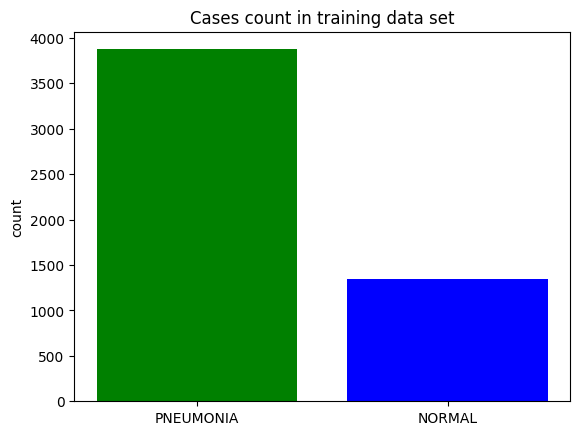

In [ ]:

plt.bar(labels, [len(negatives), len(positives)], color=["green", "blue"])
plt.title("Cases count in training data set")
plt.ylabel("count")
plt.show()

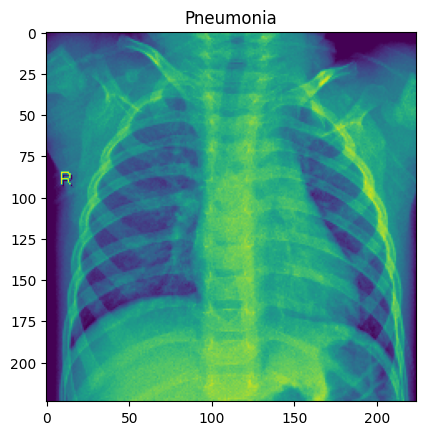

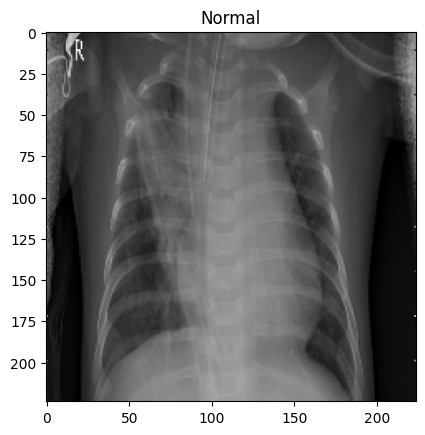

In [ ]:
plt.imshow(positives[0])
plt.title("Pneumonia")
plt.show()

plt.imshow(negatives[4], cmap="gray")
plt.title("Normal")
plt.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)




# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')




test_set = test_datagen.flow_from_directory('/content/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
from keras.callbacks import EarlyStopping

# Create an instance of the EarlyStopping callback
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True, mode='max', verbose=2)

# Train the model with early stopping
history = model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    callbacks=[early_stop]
)




Epoch 1/10
522/522 [==============================] - 145s 259ms/step - loss: 0.1785 - accuracy: 0.9350 - val_loss: 0.2180 - val_accuracy: 0.9215
Epoch 2/10
522/522 [==============================] - 124s 238ms/step - loss: 0.1683 - accuracy: 0.9463 - val_loss: 0.2930 - val_accuracy: 0.9247
Epoch 3/10
522/522 [==============================] - 124s 237ms/step - loss: 0.1404 - accuracy: 0.9576 - val_loss: 0.5607 - val_accuracy: 0.8702
Epoch 4/10
522/522 [==============================] - 125s 240ms/step - loss: 0.1284 - accuracy: 0.9628 - val_loss: 0.3236 - val_accuracy: 0.9199
Epoch 5/10
522/522 [==============================] - 125s 239ms/step - loss: 0.1129 - accuracy: 0.9680 - val_loss: 0.7391 - val_accuracy: 0.8798
Epoch 6/10
522/522 [==============================] - 124s 238ms/step - loss: 0.1199 - accuracy: 0.9653 - val_loss: 0.3510 - val_accuracy: 0.9279
Epoch 7/10
522/522 [==============================] - 124s 238ms/step - loss: 0.1375 - accuracy: 0.9670 - val_loss: 2.1871 -

1/1 [==============================] - 0s 170ms/step


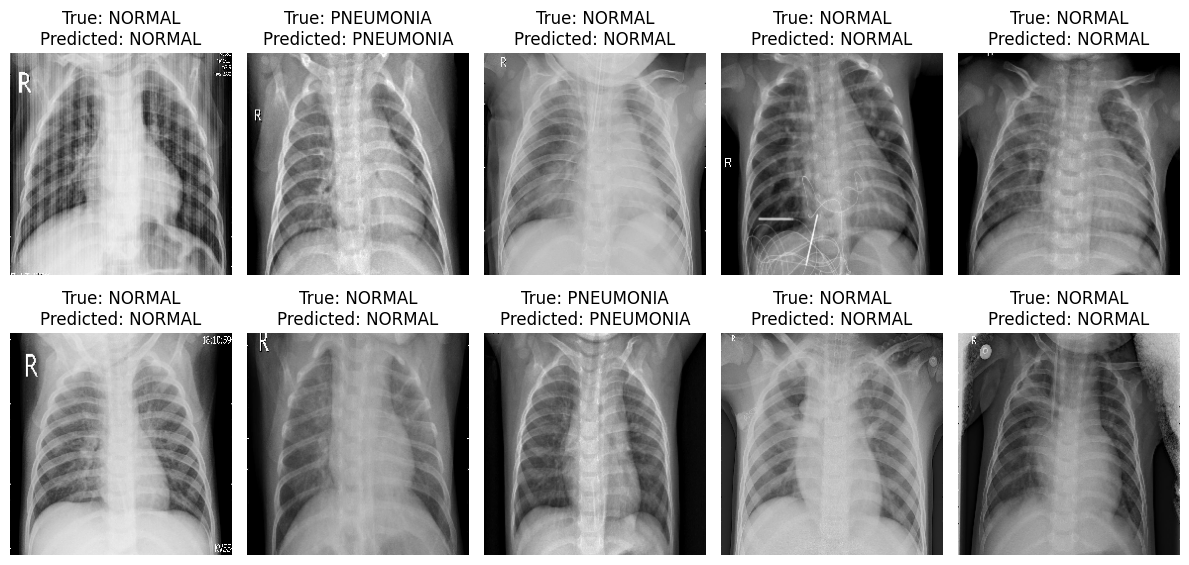

In [ ]:

# Get a batch of test images and labels
test_images, test_labels = next(iter(test_set))

# Make predictions using the trained model
predictions = model.predict(test_images)

# Get the predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Display the images and predicted labels
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.flatten()

for i, (image, true_label, predicted_label) in enumerate(zip(test_images, test_labels, predicted_labels)):
    # Rescale the image to 0-255 range
    image = (image * 255).astype(np.uint8)

    # Plot the image
    axes[i].imshow(image)
    axes[i].axis('off')

    # Set the title as the true label and predicted label
    true_label = labels[np.argmax(true_label)]
    predicted_label = labels[predicted_label]
    title = f'True: {true_label}\nPredicted: {predicted_label}'
    axes[i].set_title(title)

plt.tight_layout()
plt.show()


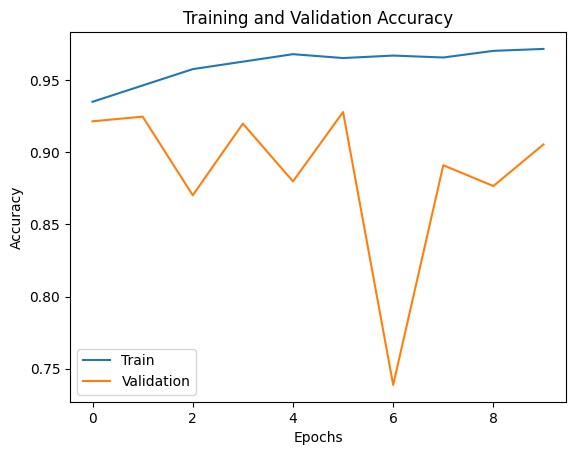

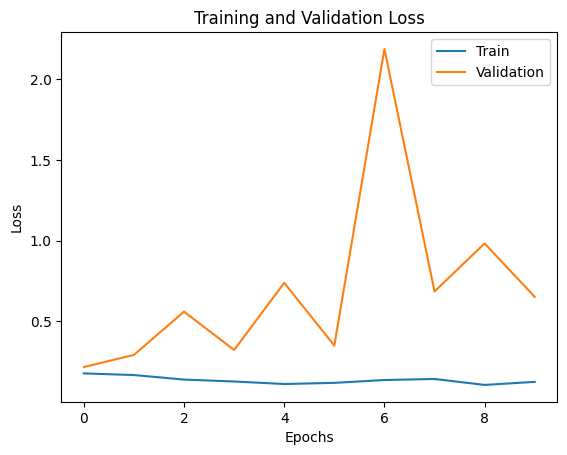

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()


63/63 [==============================] - 10s 159ms/step


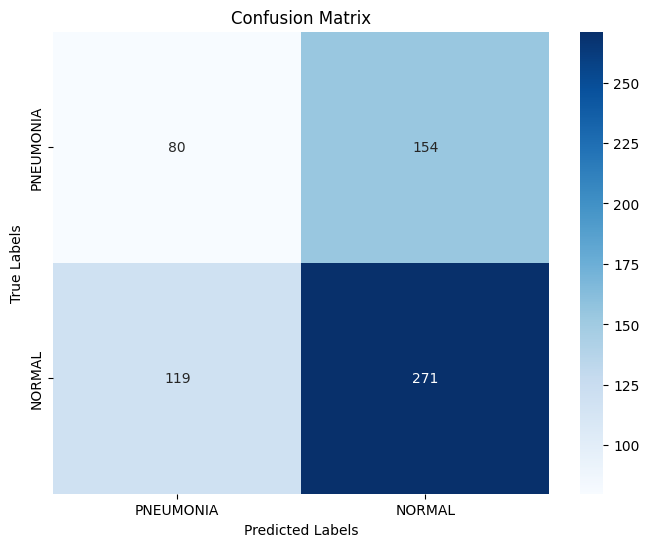

In [ ]:
true_labels = test_set.classes
predicted_labels = model.predict(test_set).argmax(axis=1)


confusion_mtx = confusion_matrix(true_labels, predicted_labels)


confusion_df = pd.DataFrame(confusion_mtx, index=labels, columns=labels)


plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
import tensorflow as tf
from keras.models import load_model

model.save('chest_xray.h5')

In [ ]:
from keras.models import load_model

In [ ]:
from keras.preprocessing import image

In [ ]:
from keras.applications.vgg16 import preprocess_input

In [ ]:
import numpy as np

In [ ]:
model=load_model('chest_xray.h5')

In [ ]:
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing import image

img = Image.open('/content/chest_xray/train/NORMAL/IM-0223-0001.jpeg')
img = img.resize((224, 224))
img = img.convert('RGB')  # convert to RGB color space
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)  # add an extra dimension for the batch size
classes = model.predict(x)
result = int(classes[0][0])






1/1 [==============================] - 0s 19ms/step


In [ ]:
x=image.img_to_array(img)

In [ ]:
x=np.expand_dims(x, axis=0)

In [ ]:
img_data=preprocess_input(x)

In [ ]:
classes=model.predict(img_data)

1/1 [==============================] - 0s 19ms/step


In [ ]:
result=int(classes[0][0])

In [ ]:
if result==0:
    print("Person is Affected By PNEUMONIA")
else:
    print("Result is Normal")

Result is Normal
